<a href="https://colab.research.google.com/github/RevazRevazashvili/DataScience_learning/blob/main/movieGeAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Installing important packages

In [5]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import re
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np


# Data Extracting

define containers for information

In [ ]:
names = []
imdb = []
genre = []
release_date = []
director = []
countrie = []
budget = []
income = []
length = []
film_length = []

In [ ]:
count = 1500

In [ ]:
# while count < 5500:
#   url = f"https://ge.movie/movie/{count}/the-hero"

#   response = requests.get(url)

#   page = bs(response.text, "html.parser")

#   name = page.select('h1>div')
#   im = page.select('a>span')
#   text = page.find_all('p', class_ = 'arial text-main desc')

#   names.append(name[0].text)
#   imdb.append(im[0].text)
#   genre.append(text[0].text)
#   release_date.append(text[1].text)
#   director.append(text[2].text)
#   length.append(text[3].text)
#   countrie.append(text[4].text)

#   count += 1


In [ ]:
length # it contains director length budget countrie and income information

creating data frame and inserting information into it

In [ ]:
movies_info = pd.DataFrame()

In [ ]:
movies_info['names'] = names
movies_info['genre'] = genre
movies_info['imdb'] = imdb
movies_info['length'] = length
movies_info['release_date'] = release_date
movies_info['director'] = director
movies_info['countrie'] = countrie

In [ ]:
release_date

In [ ]:
movies_info.head()

,names,genre,imdb,length,release_date,director,countrie
0,\nკონსტანტინი (2005)\n,"ჟანრი: დეტექტივი, დრამა, ფანტასტიკა, ფენტეზი, ...",7.0,რეჟისორი: Francis Lawrence ხანგრძლივობა: 121 წ...,"სტუდია: Village Roadshow Pictures, DC Comics, ...",გამოშვების წელი: 2005,ხანგრძლივობა: 121 წთ
1,\nკერკეტი კაკალი (1988)\n,"ჟანრი: საახალწლო, თრილერი, მძაფრ-სიუჟეტიანი",8.2,რეჟისორი: John McTiernan ხანგრძლივობა: 131 წთ ...,"სტუდია: Gordon Company, Silver Pictures, 20th ...",გამოშვების წელი: 1988,ხანგრძლივობა: 131 წთ
2,\nვარსკვლავური დესანტი (1997)\n,"ჟანრი: კრიმინალური, მძაფრ-სიუჟეტიანი, სათავგად...",7.3,რეჟისორი: Paul Verhoeven ხანგრძლივობა: 129 წთ ...,"სტუდია: Touchstone Pictures, TriStar Pictures,...",გამოშვების წელი: 1997,ხანგრძლივობა: 129 წთ
3,\nმუმია (1999)\n,"ჟანრი: მძაფრ-სიუჟეტიანი, სათავგადასავლო, ფენტეზი",7.1,რეჟისორი: Stephen Sommers ხანგრძლივობა: 124 წთ...,"სტუდია: Universal Pictures, Alphaville Films",გამოშვების წელი: 1999,ხანგრძლივობა: 124 წთ
4,\nზარი (2002)\n,"ჟანრი: დეტექტივი, საშინელებათა, დეტექტივი",7.1,რეჟისორი: Gore Verbinski ხანგრძლივობა: 115 წთ ...,"სტუდია: BenderSpink, Parkes+MacDonald Image Na...",გამოშვების წელი: 2002,ხანგრძლივობა: 115 წთ


In [ ]:
# to download csv file on local
# def downloader(s):
#   s.to_csv(s, index=False)
#   files.download(s)

# Data Preprocessing

In [ ]:
year = [i.split()[-1] for i in movies_info['director']]

In [ ]:
pattern = r"რეჟისორი: (.*?) ხანგრძლივობა: (\d+) წთ ქვეყანა: (.*?) ბიუჯეტი: \$ ([\d,]+) შემოსავალი: \$ ([\d,]+)"
d = []
du = []
c = []
b = []
r = []
for text in movies_info['length']:
  match = re.search(pattern, text)
  if match:
      d.append(match.group(1))
      du.append(match.group(2))
      c.append(match.group(3))
      b.append(match.group(4))
      r.append(match.group(5))
  else:
    d.append(None)
    du.append(None)
    c.append(None)
    b.append(None)
    r.append(None)

In [ ]:
for i in names:
  name.append(re.sub(r'\([^)]*\)', '', i).strip())
len(name)

In [ ]:
len(c)

4000

In [ ]:
filtered_movies_df = pd.DataFrame()

In [ ]:
filtered_movies_df['name'] = name
filtered_movies_df['genre'] = genre
filtered_movies_df['imdb'] = imdb
filtered_movies_df['duration'] = du
filtered_movies_df['year'] = year
filtered_movies_df['director'] = d
filtered_movies_df['country'] = c
filtered_movies_df['budget'] = b
filtered_movies_df['revenue'] = r

In [ ]:
filtered_movies_df.to_csv('filtered_movies_df.csv', index=False)
files.download('filtered_movies_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data Analysis

In [8]:
directors_film_count = {}
countries = {}

In [9]:
data = pd.read_csv('movieGE-edited.csv')

In [81]:
data.head()

,name,genre,imdb,duration,year,director,country,budget,revenue,income
0,რკინის საფარი,"დრამა, საომარი",8.3,117,1987,Stanley Kubrick,დიდი ბრიტანეთი,17000000.0,46357676.0,29357676.0
1,უცხოპლანეტელი,"სათავგადასავლო, საოჯახო, ფანტასტიკა, ფენტეზი",7.9,115,1982,Steven Spielberg,აშშ,10500000.0,792965326.0,782465326.0
2,დამოუკიდებლობის დღე,"მძაფრ-სიუჟეტიანი, სათავგადასავლო, ფანტასტიკა",7.0,145,1996,Roland Emmerich,აშშ,75000000.0,817400891.0,742400891.0
3,მატრიცა,"მძაფრ-სიუჟეტიანი, ფანტასტიკა",8.7,136,1999,"Lilly Wachowski, Lana Wachowski",ავსტრალია,63000000.0,463517383.0,400517383.0
4,მატრიცა: გადატვირთვა,"მძაფრ-სიუჟეტიანი, სათავგადასავლო, ფანტასტიკა",7.2,138,2003,"Lilly Wachowski, Lana Wachowski",ავსტრალია,150000000.0,738599701.0,588599701.0


In [11]:
type(data['budget'][1])

str

In [12]:
bud = []
for i in data['budget']:
  bud.append(float(i.replace(',','')))
data['budget'] = bud

In [13]:
rev = []
for i in data['revenue']:
  rev.append(float(i.replace(',','')))
data['revenue'] = rev

In [15]:
data.shape

(2357, 9)

maximal and minimal income

In [16]:
max(data['revenue']-data['budget']), min(data['revenue']-data['budget'])

(2996000000.0, -165710090.0)

In [ ]:
income = []
for i in range(len(data['budget'])):
  income.append(data['revenue'][i]-data['budget'][i])
income

In [18]:
data['income'] = income

In [19]:
data.head()

,name,genre,imdb,duration,year,director,country,budget,revenue,income
0,რკინის საფარი,"დრამა, საომარი",8.3,117,1987,Stanley Kubrick,დიდი ბრიტანეთი,17000000.0,46357676.0,29357676.0
1,უცხოპლანეტელი,"სათავგადასავლო, საოჯახო, ფანტასტიკა, ფენტეზი",7.9,115,1982,Steven Spielberg,აშშ,10500000.0,792965326.0,782465326.0
2,დამოუკიდებლობის დღე,"მძაფრ-სიუჟეტიანი, სათავგადასავლო, ფანტასტიკა",7.0,145,1996,Roland Emmerich,აშშ,75000000.0,817400891.0,742400891.0
3,მატრიცა,"მძაფრ-სიუჟეტიანი, ფანტასტიკა",8.7,136,1999,"Lilly Wachowski, Lana Wachowski",ავსტრალია,63000000.0,463517383.0,400517383.0
4,მატრიცა: გადატვირთვა,"მძაფრ-სიუჟეტიანი, სათავგადასავლო, ფანტასტიკა",7.2,138,2003,"Lilly Wachowski, Lana Wachowski",ავსტრალია,150000000.0,738599701.0,588599701.0


the film with most income

In [20]:
print(data.loc[np.where(data['income']==max(data['income']))[0][0]])

name                     ქარწაღებულნი
genre       დრამა, მელოდრამა, საომარი
imdb                              8.2
duration                          233
year                             1939
director               Victor Fleming
country                           აშშ
budget                      4000000.0
revenue                  3000000000.0
income                   2996000000.0
Name: 86, dtype: object


In [21]:
for i in data['director']:
  if i in directors_film_count:
    directors_film_count[i] += 1
  else:
    directors_film_count[i] = 1

In [22]:
len(directors_film_count)

1156

director with the most of films quantity

In [23]:
max_pair = max(directors_film_count.items(), key=lambda item: item[1])
max_key = max_pair[0]
max_value = max_pair[1]
print(max_key,max_value)

Clint Eastwood 13


film with the highest imdb

In [25]:
print(data.loc[np.where(data['imdb']==max(data['imdb']))[0][0]])

name                  მაკულატურა
genre       თრილერი, კრიმინალური
imdb                         8.9
duration                     154
year                        1994
director       Quentin Tarantino
country                      აშშ
budget                 8000000.0
revenue              213928762.0
income               205928762.0
Name: 52, dtype: object


In [26]:
for countr in data['country']:
  if countr in countries:
    countries[countr] += 1
  else:
    countries[countr] = 1

country with the most of films quantity

In [29]:
max_pair_of_country = max(countries.items(), key=lambda item: item[1])
max_key = max_pair_of_country[0]
print(max_key)

აშშ


popular genre

In [80]:
genres = {}
for gen in data['genre']:
  gen = str(gen)
  gen = gen.split(',')[0]
  if gen in genres:
    genres[gen] += 1
  else:
    genres[gen] = 1

genres plot

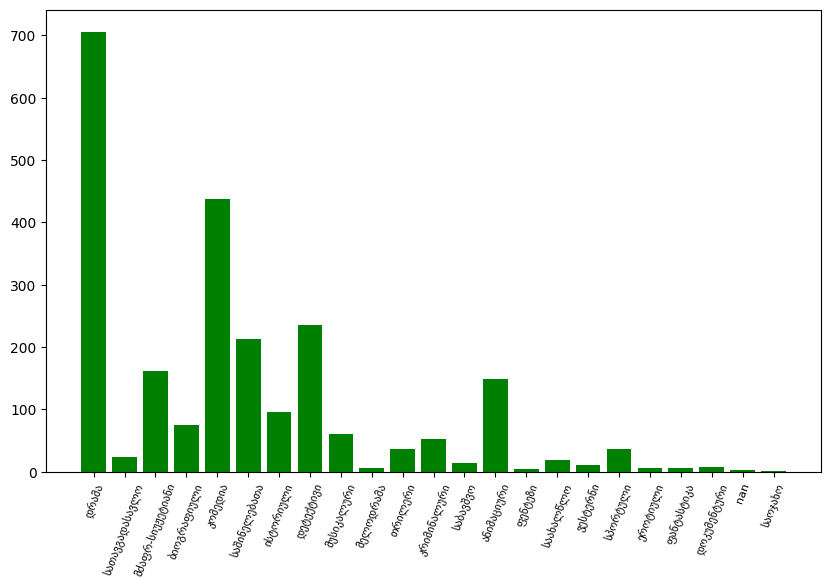

In [79]:
plt.figure(figsize=(10, 6))
plt.bar(genres.keys(),genres.values(), color='g')
plt.xticks(rotation=70, fontsize=8)
plt.show()

countries plot of films quantity

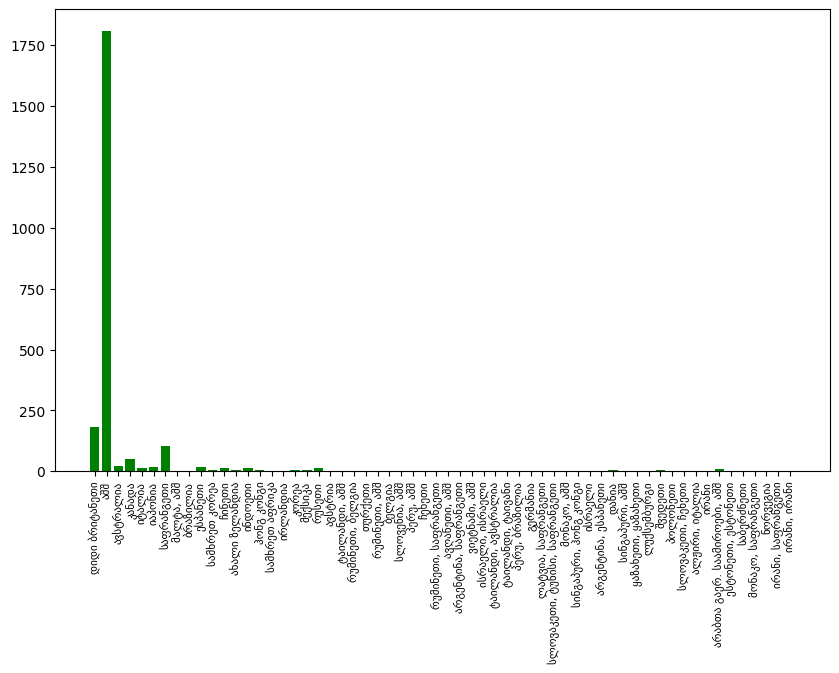

In [45]:
plt.figure(figsize=(10, 6))
plt.bar(countries.keys(),countries.values(), color='g')
plt.xticks(rotation=90, fontsize=8)
plt.show()

<Figure size 1800x800 with 0 Axes>

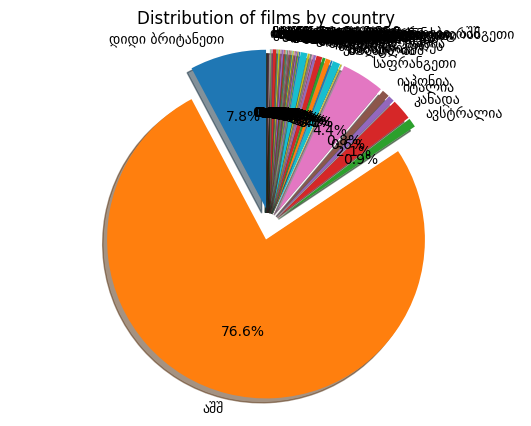

In [59]:
plt.figure(figsize=(18, 8))
explode = [0.1] * len(countries)
labels = countries.keys()
fig1, ax1 = plt.subplots()
ax1.pie(countries.values(), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode)
ax1.axis('equal')

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.title('Distribution of films by country')
plt.show()
